In [69]:
from keras import layers
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers.core import Dropout
from keras.models import Sequential
from keras import optimizers
from keras import losses
import keras.utils as np_utils

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [70]:
def load_crime_data(df):
    dt = pd.read_csv(df,delim_whitespace = False,header=None)
    dt = dt.replace("?",np.NAN)
    dt = dt.values
    train_data = dt[:1500,5:127].astype("float")
    test_data = dt[1500:,5:127].astype("float")
    train_labels = dt[:1500,127:128].astype("float")
    test_labels = dt[1500:,127:128].astype("float")
    return (train_data,train_labels),(test_data,test_labels)

def load_iris_data(df):
    dt = pd.read_csv(df,delim_whitespace = False,header=None)
    dt = dt.replace("?",np.NAN)
    dt = dt.sample(frac=1)
    dt = dt.values
    train_data = dt[:100,:4].astype("float")
    test_data = dt[100:,:4].astype("float")
    train_labels = np_utils.to_categorical(dt[:100,3])
    test_labels = np_utils.to_categorical(dt[100:,3])
    return (train_data,train_labels),(test_data,test_labels)

494/494 [==============================] - 0s 81us/step
Test Results:sgd-mse: [0.03767597756390026, 0.0020242914979757085]
494/494 [==============================] - 0s 67us/step
Test Results:sgd-mae: [0.11540098081112873, 0.004048582995951417]
494/494 [==============================] - 0s 69us/step
Test Results:sgd-logcosh: [0.012895758699263758, 0.008097165991902834]
494/494 [==============================] - 0s 69us/step
Test Results:rms-mse: [0.021271765428154094, 0.012145748987854251]
494/494 [==============================] - 0s 69us/step
Test Results:rms-mae: [0.10027463043387602, 0.012145748987854251]
494/494 [==============================] - 0s 56us/step
Test Results:rms-logcosh: [0.009766592678089856, 0.012145748987854251]
494/494 [==============================] - 0s 73us/step
Test Results:adaGrad-mse: [0.019889061026244995, 0.012145748987854251]
494/494 [==============================] - 0s 66us/step
Test Results:adaGrad-mae: [0.0974335806512157, 0.012145748987854251]
494/

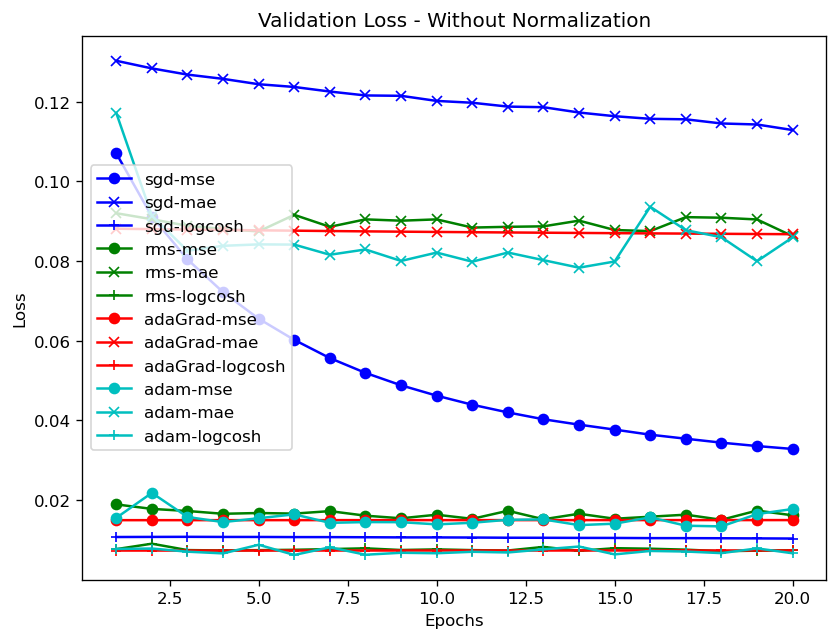

In [51]:
(train_data,train_labels),(test_data,test_labels) = load_crime_data("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data")
imp = SimpleImputer(missing_values=np.NAN, strategy='mean')
train_data = imp.fit_transform(train_data)
test_data = imp.fit_transform(test_data)
train_labels = imp.fit_transform(train_labels)
test_labels = imp.fit_transform(test_labels)

ep = 20
inputShape = (train_data.shape[1],)

sgd = optimizers.SGD(lr=0.0001,decay = 1e-6,momentum=0.9,nesterov=True)
rms = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)
adaGrad = optimizers.Adadelta(lr=0.0001, rho=0.95, epsilon=None, decay=0.0)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

mse = losses.mean_squared_error
mae = losses.mean_absolute_error
logcosh = losses.logcosh

model = Sequential()
model.add(layers.Dense(64,input_shape=(train_data.shape[1],)))
model.add(Activation('relu'))

model.add(layers.Dense(32))
model.add(Activation('relu'))

model.add(layers.Dense(1))

plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
params = {'optimizer':[sgd,rms,adaGrad,adam],'losses':[mse,mae,logcosh]}

labels_losses = ['mse','mae','logcosh']
labels_optimizers = ['sgd','rms','adaGrad','adam']
colors = {0: 'b',1: 'g',2: 'r',3: 'c'}
markers = {0: 'o', 1: 'x',2: '+'}

for i, opt_param in enumerate(params['optimizer']):
    for j, opt_loss in enumerate(params['losses']):
        model.compile(loss = opt_loss,optimizer=opt_param,metrics=['accuracy'])

        result = model.fit(train_data, train_labels,epochs=ep,batch_size=32,validation_split=0.1,verbose=0)

        val_loss_values = result.history['val_loss']
        epochs = range(1,len(val_loss_values)+1)
        plt.plot(epochs,val_loss_values,color=colors[i],marker=markers[j],label =  labels_optimizers[i]+ '-' +labels_losses[j])
        
        print("Test Results:{}-{}: {}".format(labels_optimizers[i],labels_losses[j],model.evaluate(test_data,test_labels)))

tittle_main = 'Validation Loss - Without Normalization'
plt.title(tittle_main)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('regression_without_normalization.png')
plt.show()

494/494 [==============================] - 0s 75us/step
Test Results:sgd-mse: [0.05510853466234709, 0.004048582995951417]
494/494 [==============================] - 0s 79us/step
Test Results:sgd-mae: [0.1394129724275728, 0.0020242914979757085]
494/494 [==============================] - 0s 75us/step
Test Results:sgd-logcosh: [0.019652233421350057, 0.0020242914979757085]
494/494 [==============================] - 0s 74us/step
Test Results:rms-mse: [0.025178898163592284, 0.008097165991902834]
494/494 [==============================] - 0s 70us/step
Test Results:rms-mae: [0.10104962975269387, 0.012145748987854251]
494/494 [==============================] - 0s 75us/step
Test Results:rms-logcosh: [0.009925942551269223, 0.012145748987854251]
494/494 [==============================] - 0s 79us/step
Test Results:adaGrad-mse: [0.020058303339942265, 0.012145748987854251]
494/494 [==============================] - 0s 79us/step
Test Results:adaGrad-mae: [0.09384739664402085, 0.012145748987854251]
494

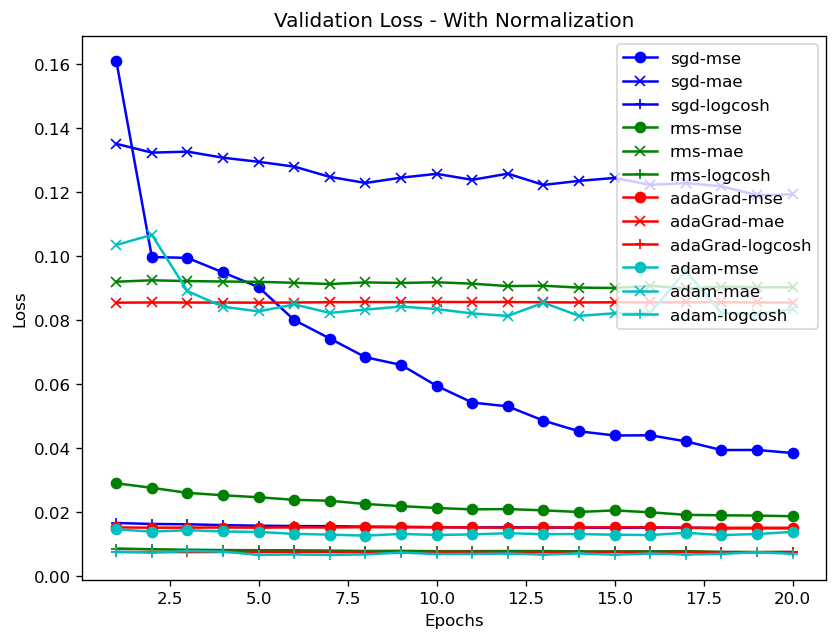

In [52]:
(train_data,train_labels),(test_data,test_labels) = load_crime_data("https://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data")
imp = SimpleImputer(missing_values=np.NAN, strategy='mean')
train_data = imp.fit_transform(train_data)
test_data = imp.fit_transform(test_data)
train_labels = imp.fit_transform(train_labels)
test_labels = imp.fit_transform(test_labels)

ep = 20
inputShape = (train_data.shape[1],)

sgd = optimizers.SGD(lr=0.0001,decay = 1e-6,momentum=0.9,nesterov=True)
rms = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)
adaGrad = optimizers.Adadelta(lr=0.0001, rho=0.95, epsilon=None, decay=0.0)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

mse = losses.mean_squared_error
mae = losses.mean_absolute_error
logcosh = losses.logcosh

model = Sequential()
model.add(layers.Dense(64,input_shape=(train_data.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(1))

plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')
params = {'optimizer':[sgd,rms,adaGrad,adam],'losses':[mse,mae,logcosh]}

labels_losses = ['mse','mae','logcosh']
labels_optimizers = ['sgd','rms','adaGrad','adam']
colors = {0: 'b',1: 'g',2: 'r',3: 'c'}
markers = {0: 'o', 1: 'x',2: '+'}

for i, opt_param in enumerate(params['optimizer']):
    for j, opt_loss in enumerate(params['losses']):
        model.compile(loss = opt_loss,optimizer=opt_param,metrics=['accuracy'])

        result = model.fit(train_data, train_labels,epochs=ep,batch_size=32,validation_split=0.1,verbose=0)

        val_loss_values = result.history['val_loss']
        epochs = range(1,len(val_loss_values)+1)
        plt.plot(epochs,val_loss_values,color=colors[i],marker=markers[j],label =  labels_optimizers[i]+ '-' +labels_losses[j])
        
        print("Test Results:{}-{}: {}".format(labels_optimizers[i],labels_losses[j],model.evaluate(test_data,test_labels)))

tittle_main = 'Validation Loss - With Normalization'
plt.title(tittle_main)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('regression_with_normalization.png')
plt.show()

50/50 [==============================] - 0s 153us/step
Test Results:sgd-cc: [0.6369550323486328, 0.8600000047683716]
50/50 [==============================] - 0s 119us/step
Test Results:sgd-ch: [0.6798691916465759, 0.8600000047683716]
50/50 [==============================] - 0s 277us/step
Test Results:sgd-kl: [0.5204431891441346, 0.8600000047683716]
50/50 [==============================] - 0s 119us/step
Test Results:rms-cc: [0.45415754318237306, 0.8600000047683716]
50/50 [==============================] - 0s 112us/step
Test Results:rms-ch: [0.481074652671814, 0.8600000047683716]
50/50 [==============================] - 0s 139us/step
Test Results:rms-kl: [0.38192294955253603, 0.8600000047683716]
50/50 [==============================] - 0s 120us/step
Test Results:adaGrad-cc: [0.38186736702919005, 0.8600000047683716]
50/50 [==============================] - 0s 160us/step
Test Results:adaGrad-ch: [0.5327887487411499, 0.8600000047683716]
50/50 [==============================] - 0s 112us/step

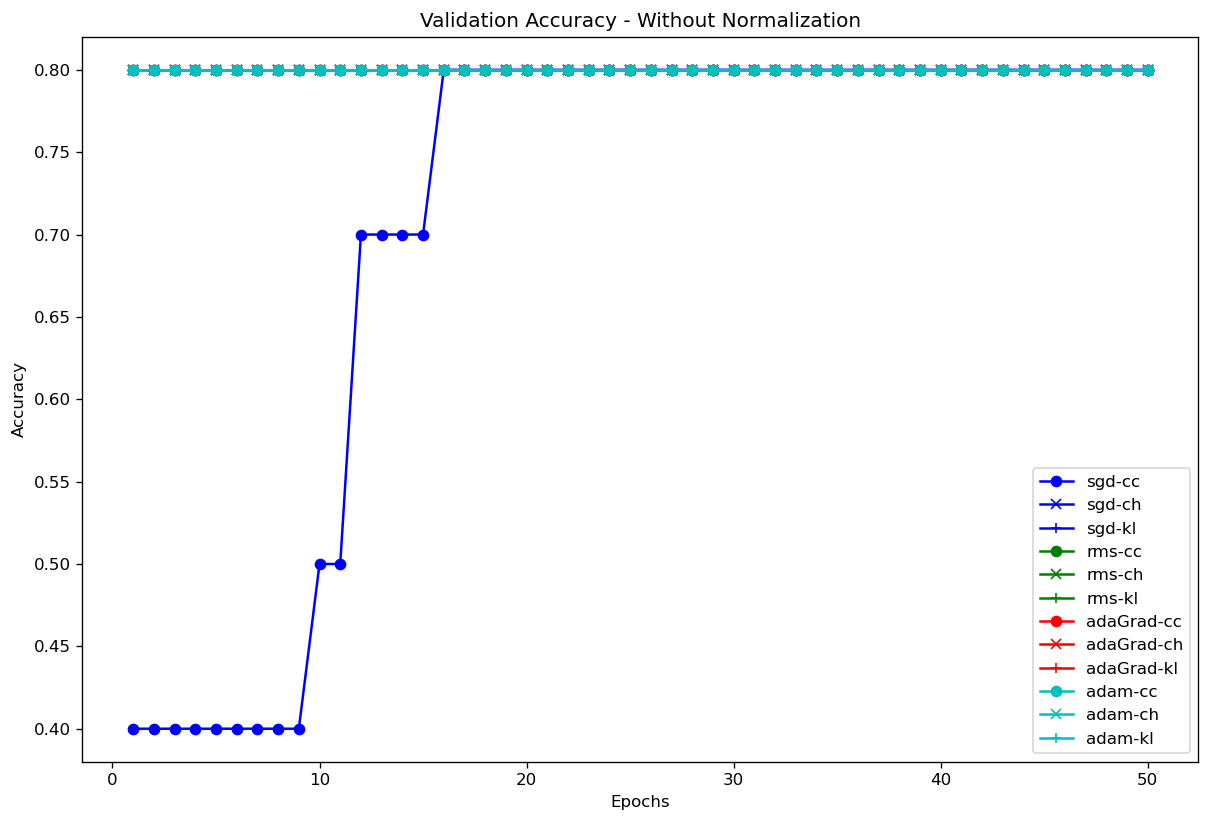

Best validation acc of epoch: 0.800000011920929


In [61]:
(x_train,y_train),(x_test,y_test) = load_iris_data("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

ep = 50
inputShape = (x_train.shape[1],)
sgd = optimizers.SGD(lr=0.0001,decay = 1e-6,momentum=0.9,nesterov=True)
rms = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)
adaGrad = optimizers.Adadelta(lr=0.0001, rho=0.95, epsilon=None, decay=0.0)
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model = Sequential()
model.add(layers.Dense(32,input_shape=inputShape))
model.add(Activation('relu'))

model.add(layers.Dense(16))
model.add(Activation('relu'))

model.add(layers.Dense(3))
model.add(Activation('softmax'))

modelList = []
plt.figure(num=None, figsize=(12, 8), dpi=120, facecolor='w', edgecolor='k')
params = {
    'optimizer':[sgd,rms,adaGrad,adam],
    'losses':['categorical_crossentropy','categorical_hinge','kullback_leibler_divergence'],
    'regularization':[ ]}
labels_losses = ['cc','ch','kl']
labels_optimizers = ['sgd','rms','adaGrad','adam']
colors = {0: 'b',1: 'g',2: 'r',3: 'c'}
markers = {0: 'o', 1: 'x',2: '+'}

for i, opt_param in enumerate(params['optimizer']):
    for j, opt_loss in enumerate(params['losses']):
        model.compile(loss = opt_loss,optimizer=opt_param,metrics=['accuracy'])

        result = model.fit(x_train, y_train,epochs=ep,batch_size=32,validation_split=0.1,verbose=False)

        modelList.append(model)

        val_acc_values = result.history['val_acc']
        epochs = range(1,len(val_acc_values)+1)
        
        plt.plot(epochs,val_acc_values,color=colors[i],marker=markers[j],label =  labels_optimizers[i]+ '-' +labels_losses[j])
        
        print("Test Results:{}-{}: {}".format(labels_optimizers[i],labels_losses[j],model.evaluate(x_test,y_test)))

tittle_main = 'Validation Accuracy - Without Normalization'
plt.title(tittle_main)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('classification_without_normalization.png')
plt.show()
    
validation_acc = np.amax(result.history['val_acc'])
print('Best validation acc of epoch:', validation_acc)

In [62]:
# Ensemble Classification
y_predicted =  np.array([model.predict(x_test) for model in modelList])
summed = np.sum(y_predicted,axis=0)
result = np.argmax(summed,axis=1)
print("Ensemble Classification Accuracy: {}".format(accuracy_score(np.argmax(y_test,axis=1),result)))

Ensemble Classification Accuracy: 0.86


50/50 [==============================] - 0s 239us/step
Test Results:sgd-cc: [0.9130182242393494, 0.5999999976158142]
50/50 [==============================] - 0s 219us/step
Test Results:sgd-ch: [0.9099583768844605, 0.6200000071525573]
50/50 [==============================] - 0s 219us/step
Test Results:sgd-kl: [0.7949862003326416, 0.7999999928474426]
50/50 [==============================] - 0s 199us/step
Test Results:rms-cc: [0.7160059142112732, 0.8599999904632568]
50/50 [==============================] - 0s 219us/step
Test Results:rms-ch: [0.770928499698639, 0.8799999904632568]
50/50 [==============================] - 0s 259us/step
Test Results:rms-kl: [0.6020152306556702, 0.8799999904632568]
50/50 [==============================] - 0s 199us/step
Test Results:adaGrad-cc: [0.6202922677993774, 0.8799999904632568]
50/50 [==============================] - 0s 219us/step
Test Results:adaGrad-ch: [0.7553301906585693, 0.8799999904632568]
50/50 [==============================] - 0s 219us/step
Te

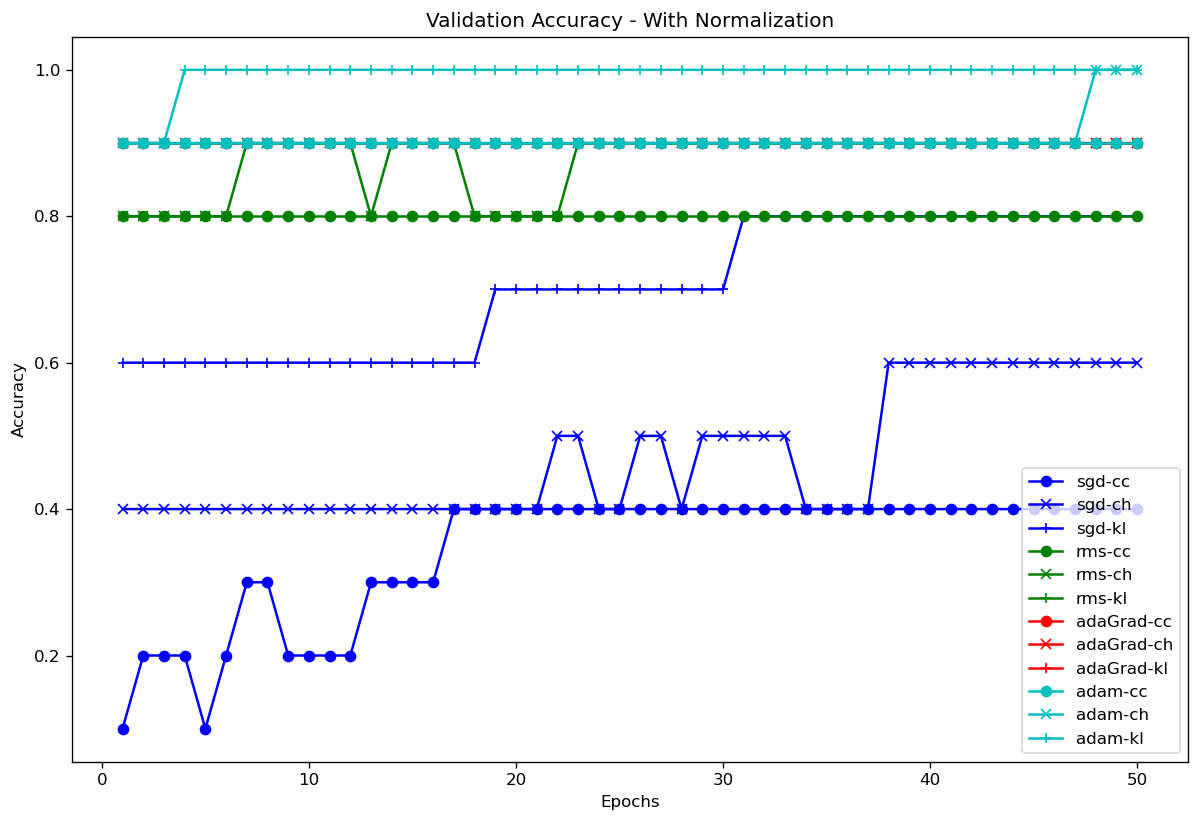

In [72]:
(x_train,y_train),(x_test,y_test) = load_iris_data("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")

ep = 50
inputShape = (x_train.shape[1],)
sgd = optimizers.SGD(lr=0.0001,decay = 1e-6,momentum=0.9,nesterov=True)
rms = optimizers.RMSprop(lr=0.0001, rho=0.9, epsilon=None, decay=0.0)
adaGrad = optimizers.Adadelta(lr=0.0001, rho=0.95, epsilon=None, decay=0.0)
adam = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model = Sequential()
model.add(layers.Dense(32,input_shape=inputShape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(16))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(layers.Dense(3))
model.add(BatchNormalization())
model.add(Activation('softmax'))

plt.figure(num=None, figsize=(12, 8), dpi=120, facecolor='w', edgecolor='k')
params = {
    'optimizer':[sgd,rms,adaGrad,adam],
    'losses':['categorical_crossentropy','categorical_hinge','kullback_leibler_divergence'],
    'regularization':[ ]}
labels_losses = ['cc','ch','kl']
labels_optimizers = ['sgd','rms','adaGrad','adam']
colors = {0: 'b',1: 'g',2: 'r',3: 'c'}
markers = {0: 'o', 1: 'x',2: '+'}

for i, opt_param in enumerate(params['optimizer']):
    for j, opt_loss in enumerate(params['losses']):
        
        model.compile(loss = opt_loss,optimizer=opt_param,metrics=['accuracy'])

        result = model.fit(x_train, y_train,epochs=ep,batch_size=32,validation_split=0.1,verbose=False)

        val_acc_values = result.history['val_acc']
        epochs = range(1,len(val_acc_values)+1)
        
        plt.plot(epochs,val_acc_values,color=colors[i],marker=markers[j],label =  labels_optimizers[i]+ '-' +labels_losses[j])
        
        print("Test Results:{}-{}: {}".format(labels_optimizers[i],labels_losses[j],model.evaluate(x_test,y_test)))

tittle_main = 'Validation Accuracy - With Normalization'
plt.title(tittle_main)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('classification_with_normalization.png')
plt.show()